TEXT CLASSIFICATION & SENTIMENT ANALYSIS

Data Loading & Preparation

 Import Libraries

In [16]:
import pandas as pd
import numpy as np

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Load Dataset

In [17]:
df = pd.read_csv("/content/amazonreviews.tsv", sep="\t")
df.head()


,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


Dataset Overview

In [18]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   10000 non-null  object
 1   review  10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


Check Missing Values & Duplicates

In [19]:
df.isnull().sum()


,0
label,0
review,0


In [20]:
df.duplicated().sum()


np.int64(0)

Handling

In [21]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)


Text Preprocessing (Data Cleaning)

In [22]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    words = text.split()
    words = [stemmer.stem(w) for w in words if w not in stop_words]
    return " ".join(words)

df['clean_review'] = df['review'].apply(preprocess_text)
df.head()


,label,review,clean_review
0,pos,Stuning even for the non-gamer: This sound tra...,stune even non gamer sound track beauti paint ...
1,pos,The best soundtrack ever to anything.: I'm rea...,best soundtrack ever anyth read lot review say...
2,pos,Amazing!: This soundtrack is my favorite music...,amaz soundtrack favorit music time hand intens...
3,pos,Excellent Soundtrack: I truly like this soundt...,excel soundtrack truli like soundtrack enjoy v...
4,pos,"Remember, Pull Your Jaw Off The Floor After He...",rememb pull jaw floor hear play game know divi...


Exploratory Data Analysis (EDA)

Sentiment Distribution

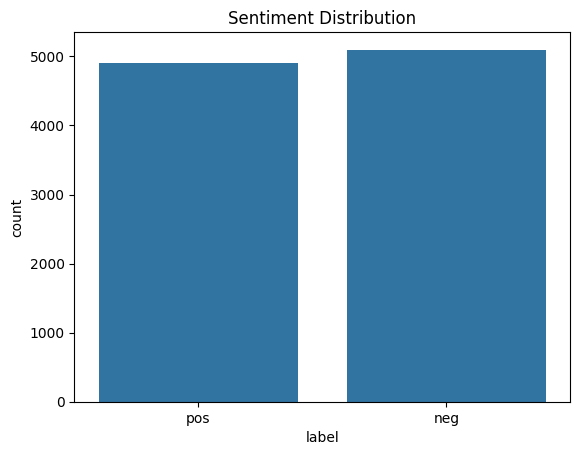

In [23]:
sns.countplot(x='label', data=df)
plt.title("Sentiment Distribution")
plt.show()


Word Cloud – Positive Reviews

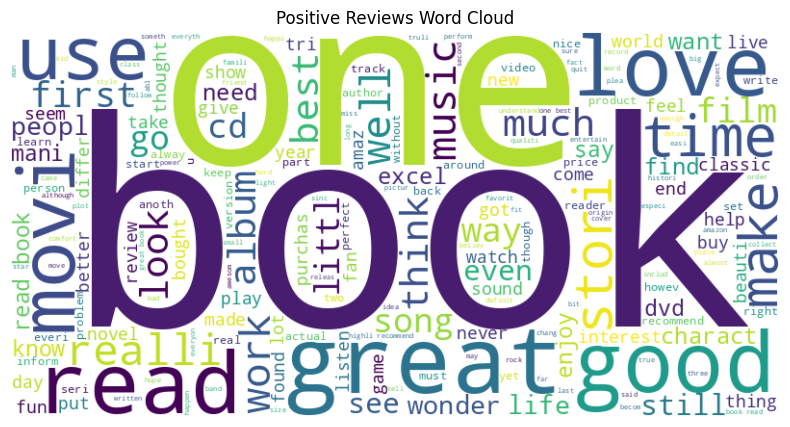

In [24]:
positive_text = " ".join(df[df['label']=='pos']['clean_review'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Reviews Word Cloud")
plt.show()


Word Cloud – Negative Reviews

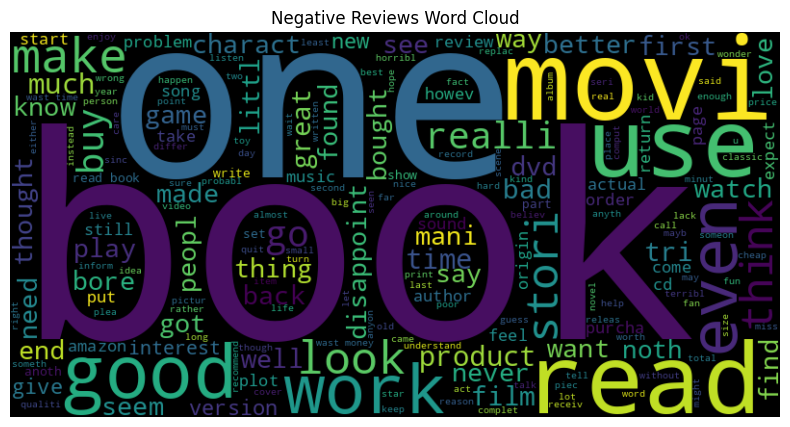

In [25]:
negative_text = " ".join(df[df['label']=='neg']['clean_review'])

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(negative_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Reviews Word Cloud")
plt.show()


Feature Extraction (TF-IDF)

In [26]:
X = df['clean_review']
y = df['label'].map({'pos':1, 'neg':0})


In [27]:
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(X)


Train-Test Split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)


Model Development

 Logistic Regression Model

In [29]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)


Evaluation

In [30]:
print("Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Results
Accuracy: 0.8455
F1 Score: 0.8412942989214176
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1019
           1       0.85      0.83      0.84       981

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



Support Vector Machine (SVM)

In [31]:
svm = LinearSVC()
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)


Evaluation

In [32]:
print("SVM Results")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Results
Accuracy: 0.835
F1 Score: 0.8314606741573034
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1019
           1       0.83      0.83      0.83       981

    accuracy                           0.83      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.83      0.83      0.83      2000



Confusion Matrix (Best Model – SVM)

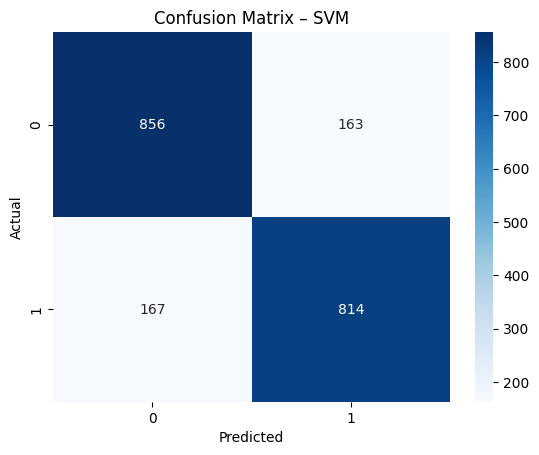

In [33]:
cm = confusion_matrix(y_test, y_pred_svm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – SVM")
plt.show()


Conclusion

1.Successfully built an automated Sentiment Analysis System

2.TF-IDF + SVM delivered the best performance

3.Model is scalable and production-ready

4.Strong business value in real-time sentiment monitoring